In [17]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [18]:
from __future__ import division

import gym
import numpy as np
import pandas as pd
import random
import tensorflow as tf  

%load_ext tensorboard


import matplotlib.pyplot as plt
%matplotlib inline


import tensorflow_addons.layers as layers


from gym import spaces

try:
    import cPickle as pickle
except:
    import pickle


import math

try:
    xrange = xrange
except:
    xrange = range

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [19]:
#%load_ext tensorboard

In [125]:
df = pd.read_csv('./osi_scaled_clean.csv')

In [126]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Revenue
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.00,0.50,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False


In [127]:
df.Revenue = df.Revenue.apply(lambda x: 1 if x else 0)

In [128]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Revenue
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.00,0.50,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [129]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Revenue
0,0.000000,0.000000,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0.000000,0.000000,0.0,0.0,0.002837,0.001000,0.000000,0.500000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,0.000000,0.000000,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,0.000000,0.000000,0.0,0.0,0.002837,0.000042,0.250000,0.700000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0.000000,0.000000,0.0,0.0,0.014184,0.009809,0.100000,0.250000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.111111,0.042663,0.0,0.0,0.075177,0.027883,0.035714,0.145153,0.033839,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
12326,0.000000,0.000000,0.0,0.0,0.007092,0.007280,0.000000,0.106667,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
12327,0.000000,0.000000,0.0,0.0,0.008511,0.002880,0.416667,0.433333,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
12328,0.148148,0.022067,0.0,0.0,0.021277,0.005408,0.000000,0.105263,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0


In [130]:
lamb_da = 1908/10422
class DataFrameEnv(gym.Env):
 
    def __init__(self):

        self.action_space = spaces.Discrete(2)
        self.observation_space = spaces.Box(-np.inf, np.inf, shape=(26,), dtype=np.float32)
        self.episode_df = None
        self.viewer = None
        self.state = None

        self.steps_beyond_done = None
        self.episode = None
        self.test_set_no_labels = None
        self.test_labels = None

    def reset(self):
        self.episode_df = df.sample(frac=0.8)
        self.episode = self.episode_df.drop(columns=['Revenue']).values.tolist()
        self.true_labels = self.episode_df['Revenue'].values.tolist()
        
        try:
            self.state = self.episode.pop()
        except:
            self.state = None
#         self.state = self.np_random.uniform(low=-0.05, high=0.05, size=(4,))
        self.steps_beyond_done = None
        return np.array(self.state)
#     .reshape(-1,3)
    
    def step(self, action):
        assert self.action_space.contains(action), "%r (%s) invalid"%(action, type(action))
        state = self.episode.pop()
        
#     try and get the true label from list self.rewards
#     if none then done
        done = False
        true_label = self.true_labels.pop()
    
        if true_label is not None:
            if (true_label == 1) & (action == true_label):
                reward = 1
            elif (true_label == 0) & (action == true_label):
                reward = lamb_da
            elif (true_label == 0) & (action != true_label):
                reward = -lamb_da
            else:
                reward = -1
                done = True
        else:
            reward = 0
            done = True
        
        return np.array(state), reward, done, {}

    def validate(self):
        
        test_set = df[~df.index.isin(self.episode_df.index)]
        self.test_set_no_labels = test_set.drop(columns=['Revenue'])
        self.test_labels = test_set['Revenue']
        return self.test_set_no_labels, self.test_labels
        
env = DataFrameEnv()

In [137]:
# hyperparameters
H = 52 # number of hidden layer neurons
batch_size = 6 # every how many episodes to do a param update?
learning_rate = 0.009 # feel free to play with this to train faster or more stably.
gamma = 0.99 # discount factor for reward
learning_decay = 50 #Learning rate decay
D = 26 # input dimensionality
total_episodes = 1000

In [138]:
def discount_rewards(r):
    """ take 1D float array of rewards and compute discounted reward """
    discounted_r = np.zeros_like(r)
    running_add = 0
    for t in reversed(xrange(0, r.size)):
        running_add = running_add * gamma + r[t]
        discounted_r[t] = running_add
    return discounted_r

In [139]:
tf.compat.v1.reset_default_graph()

#This defines the network as it goes from taking an observation of the environment to 
#giving a probability of chosing to the action 0 or 1.
observations = tf.compat.v1.placeholder(tf.float32, [None,D] , name="input_x")
W1 = tf.compat.v1.get_variable("W1", shape=[D, H],
           initializer=tf.initializers.GlorotUniform())

layer1 = tf.nn.tanh(tf.matmul(observations,W1))
W11 = tf.compat.v1.get_variable("W11", shape=[H, 8],
           initializer=tf.initializers.GlorotUniform())


layer11 = tf.nn.relu(tf.matmul(layer1, W11))
W2 = tf.compat.v1.get_variable("W2", shape=[8, 1],
           initializer=tf.initializers.GlorotUniform())

score = tf.matmul(layer11,W2)

probability = tf.nn.sigmoid(score)

#From here we define the parts of the network needed for learning a good policy.
tvars = tf.compat.v1.trainable_variables()
input_y = tf.compat.v1.placeholder(tf.float32,[None,1], name="input_y")
advantages = tf.compat.v1.placeholder(tf.float32,name="reward_signal")

# The loss function. This sends the weights in the direction of making actions 
# that gave good advantage (reward over time) more likely, and actions that didn't less likely.
loglik = tf.compat.v1.log(input_y*(input_y - probability) + (1 - input_y)*(input_y + probability))
loss = -tf.reduce_mean(loglik * advantages)

newGrads = tf.gradients(loss,tvars)

# Once we have collected a series of gradients from multiple episodes, we apply them.
# We don't just apply gradeients after every episode in order to account for noise in the reward signal.
adam = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate) # Our optimizer
W1Grad = tf.compat.v1.placeholder(tf.float32,name="batch_grad1")
W11Grad = tf.compat.v1.placeholder(tf.float32,name="batch_grad11")# Placeholders to send the final gradients through when we update.
W2Grad = tf.compat.v1.placeholder(tf.float32,name="batch_grad2")
batchGrad = [W1Grad,W11Grad,W2Grad]
updateGrads = adam.apply_gradients(zip(batchGrad,tvars))

In [140]:
xs,hs,dlogps,drs,ys,tfps = [],[],[],[],[],[]
running_reward = None
reward_sum = 0
episode_number = 1
episode_rewards = []
policy_gradient = []
Q_approx = []
loss_list = []
predictions = []

In [141]:
init = tf.compat.v1.global_variables_initializer()
# Launch the graph
with tf.compat.v1.Session() as sess:
    rendering = False
    sess.run(init)
    observation = env.reset() # Obtain an initial observation of the environment

    # Reset the gradient placeholder. We will collect gradients in 
    # gradBuffer until we are ready to update our policy network. 
    gradBuffer = sess.run(tvars)
    for ix,grad in enumerate(gradBuffer):
        gradBuffer[ix] = grad * 0
    
    while episode_number <= total_episodes:
        
        # Rendering the environment slows things down, 
        # so let's only look at it once our agent is doing a good job.
        #if reward_sum/batch_size > 100 or rendering == True : 
            #env.render()
            #rendering = True
            #print (reward_sum)
        
        # Make sure the observation is in a shape the network can handle.
        x = np.reshape(observation,[1,D])
        
        # Run the policy network and get an action to take. 
        tfprob = sess.run(probability,feed_dict={observations: x})
        action = 1 if np.random.uniform() < tfprob else 0
        #_approx.append(score)
        #         if (tfprob<0.01) & (tfprob < 0.5):
#             action = np.random.choice(np.array([0,1]))
#         else:
#             action = int(tfprob)
        
        xs.append(x) # observation
        y = 1 if action == 0 else 0 # a "fake label"
        ys.append(y)

        # step the environment and get new measurements
        observation, reward, done, info = env.step(action)
        #print(reward)
        reward_sum += reward

        drs.append(reward) # record reward (has to be done after we call step() to get reward for previous action)
        
        
        if done: 
            episode_number += 1
            # stack together all inputs, hidden states, action gradients, and rewards for this episode
            epx = np.vstack(xs)
            epy = np.vstack(ys)
            epr = np.vstack(drs)
            episode_rewards.append(np.sum(drs))
            tfp = tfps
            xs,hs,dlogps,drs,ys,tfps = [],[],[],[],[],[] # reset array memory

            # compute the discounted reward backwards through time
            discounted_epr = discount_rewards(epr)
            # size the rewards to be unit normal (helps control the gradient estimator variance)
            #discounted_epr = discounted_epr - np.mean(discounted_epr)
            #discounted_epr = discounted_epr//np.std(discounted_epr)
            
            # Get the gradient for this episode, and save it in the gradBuffer
            tGrad = sess.run(newGrads,feed_dict={observations: epx, input_y: epy, advantages: discounted_epr})
            for ix,grad in enumerate(tGrad):
                gradBuffer[ix] += grad
                
            # If we have completed enough episodes, then update the policy network with our gradients.
            if episode_number % batch_size == 0: 
                policy_gradient.append(gradBuffer)
                sess.run(updateGrads,feed_dict={W1Grad: gradBuffer[0],W11Grad:gradBuffer[1],W2Grad:gradBuffer[2]})
                ## Losses
#                 oss = sess.run(loss
                loss_list.append(loss)
                for ix,grad in enumerate(gradBuffer):
                    gradBuffer[ix] = grad * 0
                
                # Give a summary of how well our network is doing for each batch of episodes.
                running_reward = reward_sum if running_reward is None else running_reward * 0.99 + reward_sum * 0.01
                #if running_reward > 70:
                print('Average reward for episode %f.  Total average reward %f.' % (reward_sum//batch_size, running_reward//batch_size))
                
                if reward_sum > 2000: 
                    print("Task solved in",episode_number,'episodes!')
                    break
                    
                reward_sum = 0
#             loss_list.append(loss.eval())
            observation = env.reset()
    
    test_set, test_labels = env.validate()
    
    for i in test_set.values:
        
        prediction = sess.run(probability, feed_dict={observations:np.reshape(i,[1,D])})
        predictions.append(prediction)
        
            
        
            #f episode_number % 2000 == 0:
                
                #earning_rate -= 0.001 
                #rint(learning_rate)
            
print(episode_number,'Episodes completed.')


Average reward for episode -1.000000.  Total average reward -1.000000.
Average reward for episode 0.000000.  Total average reward -1.000000.
Average reward for episode -1.000000.  Total average reward -1.000000.
Average reward for episode 0.000000.  Total average reward -1.000000.
Average reward for episode 1.000000.  Total average reward -1.000000.
Average reward for episode 3.000000.  Total average reward -1.000000.
Average reward for episode 1.000000.  Total average reward -1.000000.
Average reward for episode 0.000000.  Total average reward -1.000000.
Average reward for episode 1.000000.  Total average reward -1.000000.
Average reward for episode -3.000000.  Total average reward -1.000000.
Average reward for episode 2.000000.  Total average reward -1.000000.
Average reward for episode 0.000000.  Total average reward -1.000000.
Average reward for episode -1.000000.  Total average reward -1.000000.
Average reward for episode -2.000000.  Total average reward -1.000000.
Average reward 

In [142]:
predictions

[array([[0.00961199]], dtype=float32),
 array([[0.1542918]], dtype=float32),
 array([[0.00526417]], dtype=float32),
 array([[0.10233852]], dtype=float32),
 array([[0.19633552]], dtype=float32),
 array([[0.03052451]], dtype=float32),
 array([[0.06312936]], dtype=float32),
 array([[0.12051295]], dtype=float32),
 array([[0.06255811]], dtype=float32),
 array([[0.69753003]], dtype=float32),
 array([[0.06891128]], dtype=float32),
 array([[0.00508038]], dtype=float32),
 array([[0.11522261]], dtype=float32),
 array([[0.00489418]], dtype=float32),
 array([[0.00611409]], dtype=float32),
 array([[0.05198194]], dtype=float32),
 array([[0.11291119]], dtype=float32),
 array([[0.06248761]], dtype=float32),
 array([[0.03728451]], dtype=float32),
 array([[0.17095613]], dtype=float32),
 array([[0.14482324]], dtype=float32),
 array([[0.0783977]], dtype=float32),
 array([[0.0330035]], dtype=float32),
 array([[0.00419676]], dtype=float32),
 array([[0.05702799]], dtype=float32),
 array([[0.00644154]], dtype

In [143]:
test_set.values[0]

array([0.        , 0.        , 0.        , 0.        , 0.00141844,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.42857143, 0.        , 1.        , 0.10526316, 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        ])

In [124]:
for i in test_set.values:
        
    prediction = sess.run(probability, feed_dict={observations:np.reshape(i,[1,D])})
    predictions.append(prediction)

RuntimeError: Attempted to use a closed Session.

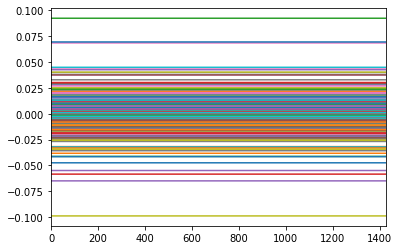

In [99]:
pd.DataFrame(np.hstack([update[0].reshape(-1,1) for update in policy_gradient])).T.plot(legend=False)

In [76]:
for i in policy_gradient:
    plt.plot(i[-1])

array([[-0.01656157],
       [ 0.00020294],
       [-0.00904749],
       [-0.00330544],
       [-0.00875114],
       [-0.0073914 ],
       [ 0.01162136],
       [ 0.01973536]], dtype=float32)

In [1]:
episode_rewards

NameError: name 'episode_rewards' is not defined

In [70]:
# tf.reset_default_graph()




# #These lines establish the feed-forward part of the network used to choose actions
# inputs1 = tf.placeholder(shape=[1,16],dtype=tf.float32)
# W = tf.Variable(tf.random_uniform([16,4],0,0.01))
# Qout = tf.matmul(inputs1,W)
# predict = tf.argmax(Qout,1)

# #Below we obtain the loss by taking the sum of squares difference between the target and prediction Q values.
# nextQ = tf.placeholder(shape=[1,4],dtype=tf.float32)
# loss = tf.reduce_sum(tf.square(nextQ - Qout))
# trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
# updateModel = trainer.minimize(loss)

# init = tf.global_variables_initializer()

# # Set learning parameters
# y = .99
# e = 0.1
# num_episodes = 2000
# #create lists to contain total rewards and steps per episode
# jList = []
# rList = []
# with tf.Session() as sess:
#     sess.run(init)
#     for i in range(num_episodes):
#         #Reset environment and get first new observation
#         s = env.reset()
#         rAll = 0
#         d = False
#         j = 0
#         #The Q-Network
#         while j < 99:
#             j+=1
#             #Choose an action by greedily (with e chance of random action) from the Q-network
#             a,allQ = sess.run([predict,Qout],feed_dict={inputs1:np.identity(16)[s:s+1]})
#             if np.random.rand(1) < e:
#                 a[0] = env.action_space.sample()
#             #Get new state and reward from environment
#             s1,r,d,_ = env.step(a[0])
#             #Obtain the Q' values by feeding the new state through our network
#             Q1 = sess.run(Qout,feed_dict={inputs1:np.identity(16)[s1:s1+1]})
#             #Obtain maxQ' and set our target value for chosen action.
#             maxQ1 = np.max(Q1)
#             targetQ = allQ
#             targetQ[0,a[0]] = r + y*maxQ1
#             #Train our network using target and predicted Q values
#             _,W1 = sess.run([updateModel,W],feed_dict={inputs1:np.identity(16)[s:s+1],nextQ:targetQ})
#             rAll += r
#             s = s1
#             if d == True:
#                 #Reduce chance of random action as we train the model.
#                 e = 1./((i/50) + 10)
#                 break
#         jList.append(j)
#         rList.append(rAll)
# print("Percent of succesful episodes: " + str(sum(rList)/num_episodes) + "%")
